     Outlook Temperature Humidity   Windy Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No
(14, 5)


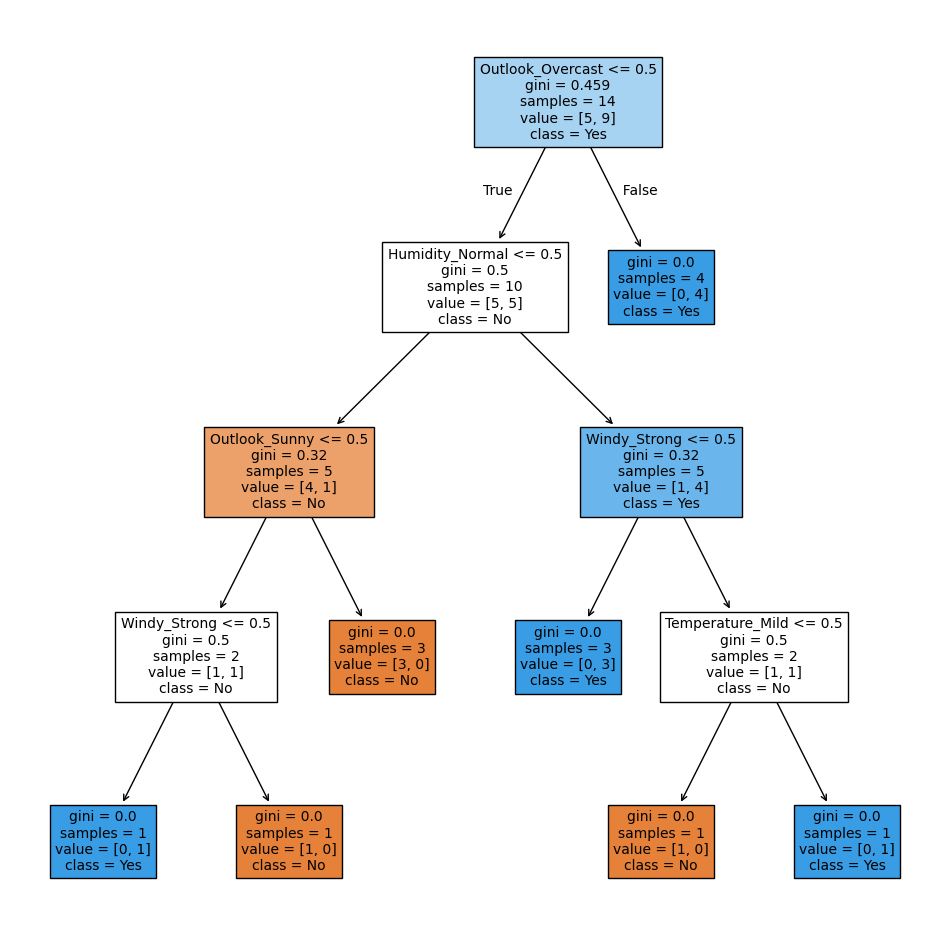

,Outlook,Temperature,Humidity,Windy,Play
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_csv(r'weather_forecast.csv')
print(data)

print(data.shape)

data.head(14)

X,y = data[['Outlook','Temperature','Humidity','Windy']],data['Play']

one_hot_data = pd.get_dummies(data[['Outlook','Temperature','Humidity','Windy']],drop_first = False)
one_hot_data_X = pd.get_dummies(X,drop_first = False)
one_hot_data_y = pd.get_dummies(y,drop_first = True)

one_hot_data_X.head(14)

classifier = tree.DecisionTreeClassifier(criterion='gini')
classifier = classifier.fit(one_hot_data_X,one_hot_data_y)
plt.figure(figsize=(12,12))
tree.plot_tree(classifier,filled = True,feature_names =one_hot_data_X.columns,class_names = ['No','Yes'],fontsize=10)

plt.show()


#Outlook == Overcast
data_Weather_OC1 = data[(data['Outlook'] == 'Overcast')]
data_Weather_OC1.head(14)




In [2]:
data_Weather_OC = data[(data['Outlook'] == 'Overcast') &
                       (data['Humidity'] == 'Normal')]
data_Weather_OC.head(14)

,Outlook,Temperature,Humidity,Windy,Play
6,Overcast,Cool,Normal,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


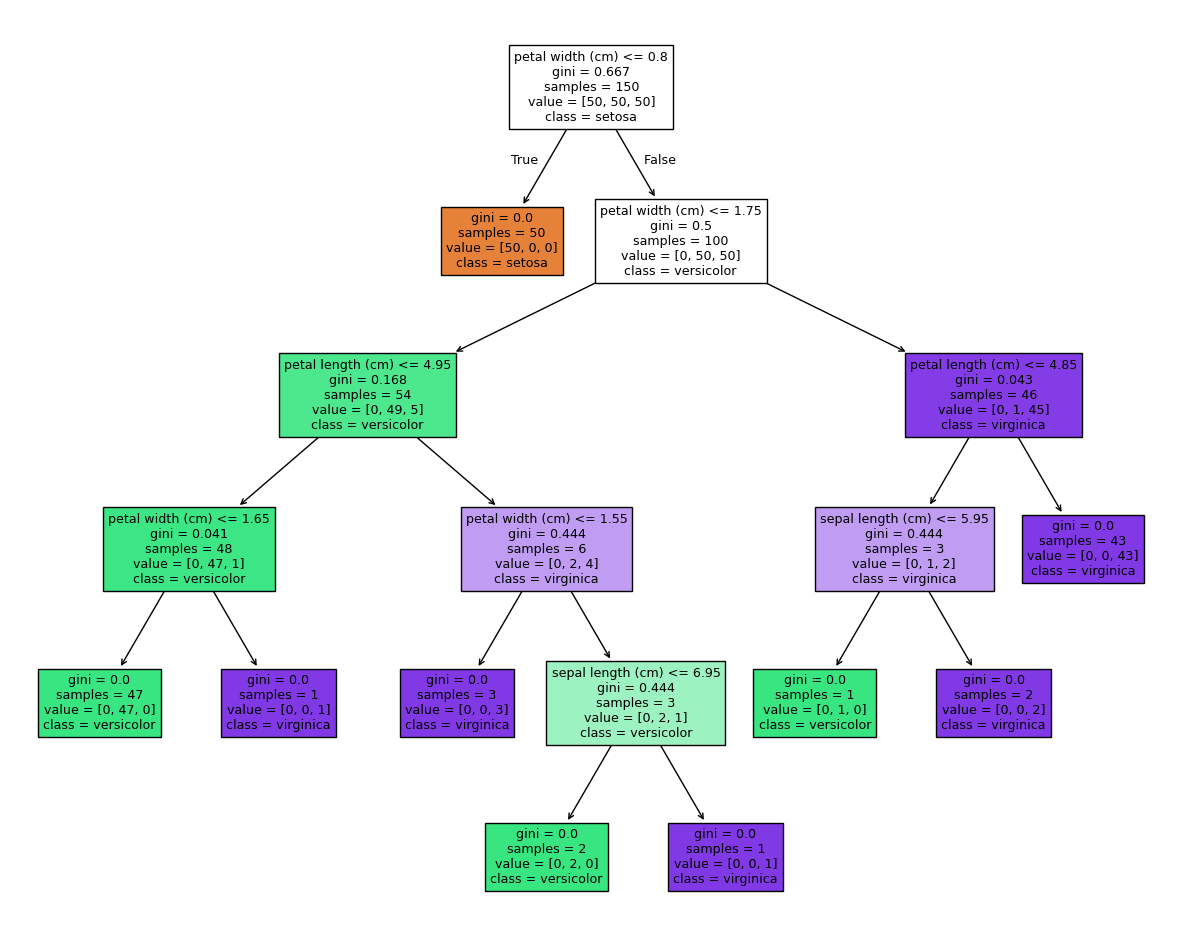

In [5]:


from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = load_iris()
X,y = iris.data,iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42,stratify=y)


classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X,y)
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,feature_names =iris.feature_names,class_names = iris.target_names,filled = True)

plt.show()

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = classifier.predict(X_test)


print("accuracy score: %.2f" % accuracy_score(y_test,y_pred))
print("precision score: %.2f" % precision_score(y_test,y_pred,average='weighted'))
print("recall score: %.2f" % recall_score(y_test,y_pred,average='weighted'))
print("f1 score: %.2f" % f1_score(y_test,y_pred,average='weighted'))

accuracy score: 1.00
precision score: 1.00
recall score: 1.00
f1 score: 1.00


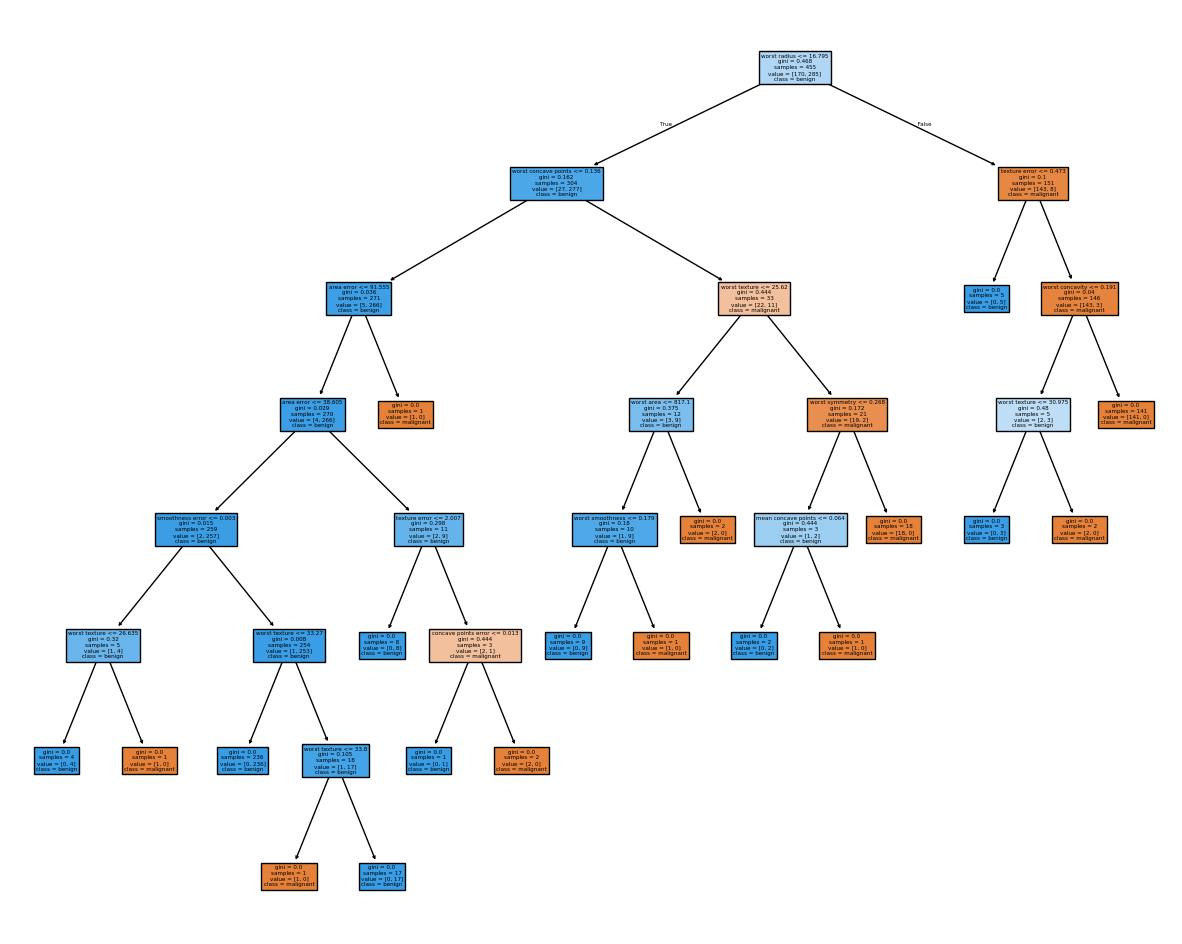

Accuracy: 0.9122807017543859
Precision: 0.9558823529411765
Recall: 0.9027777777777778
F1 Score: 0.9285714285714286


In [8]:



from sklearn.datasets import load_breast_cancer
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load breast cancer dataset
bc = load_breast_cancer()
X, Y = bc.data, bc.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Train Decision Tree classifier
classifier = tree.DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(15, 12))
tree.plot_tree( classifier,feature_names=bc.feature_names, class_names=bc.target_names, filled=True)
plt.show()

# Evaluate model
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
